<a href="https://www.kaggle.com/code/kaixiongf/company-bankruptcy-w-pycaret?scriptVersionId=106402001" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Table Of Contents**
​
* [1. Introduction](#section-one)
* [2. Understanding Shape of Data](#section-two)
* [3. Data Cleaning and Exploration](#section-three)
    - [3.1 Missing Values and Cleaning](#subsection-three.one)
    - [3.2 Distribution of all Features](#subsection-three.two)
    - [3.3 Sub Sampling](#subsection-three.three)
* [4. Feature Engineering](#section-four)
    - [4.1 Correlation/Heatmap](#subsection-four.one)
    - [4.2 Distribution of Features after sub-sampling](#subsection-four.two)
    - [4.3 Boxplot](#subsection-four.three)
    - [4.4 IQR Outlier removal](#subsection-four.four)
* [5. Data Preprocessing](#section-five)
    - [5.1 Feature Encoding](#subsection-five.one)
    - [5.2 Log Transform Skewed data](#subsection-five.two)
* [6. Model Building with Pycaret](#section-six)
    - [6.1 Cross-validation](#subsection-six.one)
* [7. Hyperparameter Tuning with Pycaret](#section-seven)
    - [7.1 Tuning](#subsection-seven.one)
    - [7.2 Ensembling](#subsection-seven.two)
* [8. Evaluate Model](#section-eight)
* [9. Discussion on Results and Models](#section-nine)
* [10. Thoughts on Pycaret](#section-ten)
* [Conclusion](#section-ten)

**Would Appreciate and Upvote! Thank you**

<a id="section-one"></a>
# **1. Introduction**

This notebook is to explore the data collected from the Taiwan Economic Journal for the years 1999 to 2009 and to see what insight can be generated during data exploration and which model is able to predict company bankruptcy most accurately.

Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

The modelling will be attempted with pycaret, an open source low code machine learning library in python that automates machine learning workflows. To explore this library and better understand its capabilities.

https://pycaret.gitbook.io/docs/

## Setting Up the Environment

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bankruptcy_df = pd.read_csv("../input/company-bankruptcy-prediction/data.csv")
bankruptcy_df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

<a id="section-two"></a>
# **2. Understanding the Shape of Data**

In [3]:
bankruptcy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
bankruptcy_df.shape

(6819, 96)

In [5]:
bankruptcy_df.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

<a id="section-three"></a>
# **3. Data Cleaning and Exploration**

<a id="subsection-three.one"></a>
## **3.1 Missing Values and Cleaning**

In [6]:
bankruptcy_df.columns[bankruptcy_df.isna().any()]

Index([], dtype='object')

Great! No missing values

In [7]:
# Adjust column names
def clean_col_names(col_name):
    col_name = (
        col_name.strip()
        .replace("?", "_")
        .replace("(", "_")
        .replace(")", "_")
        .replace(" ", "_")
        .replace("/", "_")
        .replace("-", "_")
        .replace("__", "_")
        .replace("'", "")
        .lower()
    )
    return col_name

In [8]:
bank_columns = list(bankruptcy_df.columns)
bank_columns = [clean_col_names(col_name) for col_name in bank_columns]
bankruptcy_df.columns = bank_columns
display(bankruptcy_df.columns)

Index(['bankrupt_', 'roa_c_before_interest_and_depreciation_before_interest',
       'roa_a_before_interest_and_%_after_tax',
       'roa_b_before_interest_and_depreciation_after_tax',
       'operating_gross_margin', 'realized_sales_gross_margin',
       'operating_profit_rate', 'pre_tax_net_interest_rate',
       'after_tax_net_interest_rate',
       'non_industry_income_and_expenditure_revenue',
       'continuous_interest_rate_after_tax_', 'operating_expense_rate',
       'research_and_development_expense_rate', 'cash_flow_rate',
       'interest_bearing_debt_interest_rate', 'tax_rate_a_',
       'net_value_per_share_b_', 'net_value_per_share_a_',
       'net_value_per_share_c_', 'persistent_eps_in_the_last_four_seasons',
       'cash_flow_per_share', 'revenue_per_share_yuan_¥_',
       'operating_profit_per_share_yuan_¥_',
       'per_share_net_profit_before_tax_yuan_¥_',
       'realized_sales_gross_profit_growth_rate',
       'operating_profit_growth_rate', 'after_tax_net_profit

<AxesSubplot:xlabel='bankrupt_', ylabel='count'>

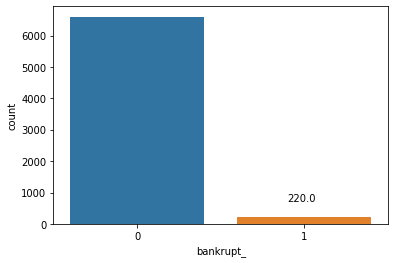

In [9]:
class_bar=sns.countplot(data=bankruptcy_df,x="bankrupt_")
ax = plt.gca()
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+500))
class_bar

<a id="subsection-three.two"></a>
## **3.2 Distribution of All Features**

* Checking for skews

In [10]:
# Return true/false if skewed
import scipy.stats
skew_df = pd.DataFrame(bankruptcy_df.select_dtypes(np.number).columns, columns = ['Feature'])

skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(bankruptcy_df[feature])) 

skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)  # to obtain magnitude of skew irrelevant of direction
skew_df['Skewed']= skew_df['Absolute Skew'].apply(lambda x: True if x>= 0.5 else False)
with pd.option_context("display.max_rows", 1000):
    display(skew_df)

Feature       Skew  \
0                                           bankrupt_   5.294223   
1   roa_c_before_interest_and_depreciation_before_...  -0.323870   
2               roa_a_before_interest_and_%_after_tax  -1.033499   
3    roa_b_before_interest_and_depreciation_after_tax  -0.763396   
4                              operating_gross_margin  -8.041599   
5                         realized_sales_gross_margin  -8.064798   
6                               operating_profit_rate -70.221713   
7                           pre_tax_net_interest_rate -52.471321   
8                         after_tax_net_interest_rate -52.984085   
9         non_industry_income_and_expenditure_revenue  39.632969   
10                continuous_interest_rate_after_tax_ -53.188417   
11                             operating_expense_rate   1.248399   
12              research_and_development_expense_rate   1.281761   
13                                     cash_flow_rate   3.989708   
14                interest_bearing_debt_interest_rate   7.031830   
15                                        tax_rate_a_   1.903456   
16                             net_value_per_share_b_   4.561319   
17                             net_value_per_share_a_   4.517138   
18                             net_value_per_share_c_   4.512748   
19            persistent_eps_in_the_last_four_seasons   5.134833   
20                                cash_flow_per_share   8.017219   
21                          revenue_per_share_yuan_¥_  43.759470   
22                 operating_profit_per_share_yuan_¥_   8.809917   
23            per_share_net_profit_before_tax_yuan_¥_   6.001270   
24            realized_sales_gross_profit_growth_rate  77.907967   
25                       operating_profit_growth_rate -71.673180   
26                   after_tax_net_profit_growth_rate -25.577739   
27                     regular_net_profit_growth_rate -25.257283   
28                  continuous_net_profit_growth_rate  67.082774   
29                            total_asset_growth_rate  -0.918589   
30                              net_value_growth_rate  80.274181   
31               total_asset_return_growth_rate_ratio  62.486212   
32                                cash_reinvestment_%   2.317734   
33                                      current_ratio  82.559071   
34                                        quick_ratio  31.637952   
35                             interest_expense_ratio -16.818853   
36                         total_debt_total_net_worth  46.345138   
37                                       debt_ratio_%   0.980580   
38                                   net_worth_assets  -0.980580   
39                long_term_fund_suitability_ratio_a_  24.962380   
40                               borrowing_dependency  20.834307   
41                   contingent_liabilities_net_worth  79.653094   
42                   operating_profit_paid_in_capital   8.947418   
43              net_profit_before_tax_paid_in_capital   6.378022   
44        inventory_and_accounts_receivable_net_value  13.109350   
45                               total_asset_turnover   2.340392   
46                       accounts_receivable_turnover  25.840861   
47                            average_collection_days  30.573359   
48                     inventory_turnover_rate_times_   1.137038   
49                    fixed_assets_turnover_frequency   2.349286   
50                     net_worth_turnover_rate_times_   8.959877   
51                                 revenue_per_person  59.421405   
52                        operating_profit_per_person   7.786586   
53                         allocation_rate_per_person  27.470100   
54                    working_capital_to_total_assets  -0.192269   
55                          quick_assets_total_assets   0.337240   
56                        current_assets_total_assets   0.075874   
57                                  cash_total_assets   2.229870   
58                     quick_asset

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


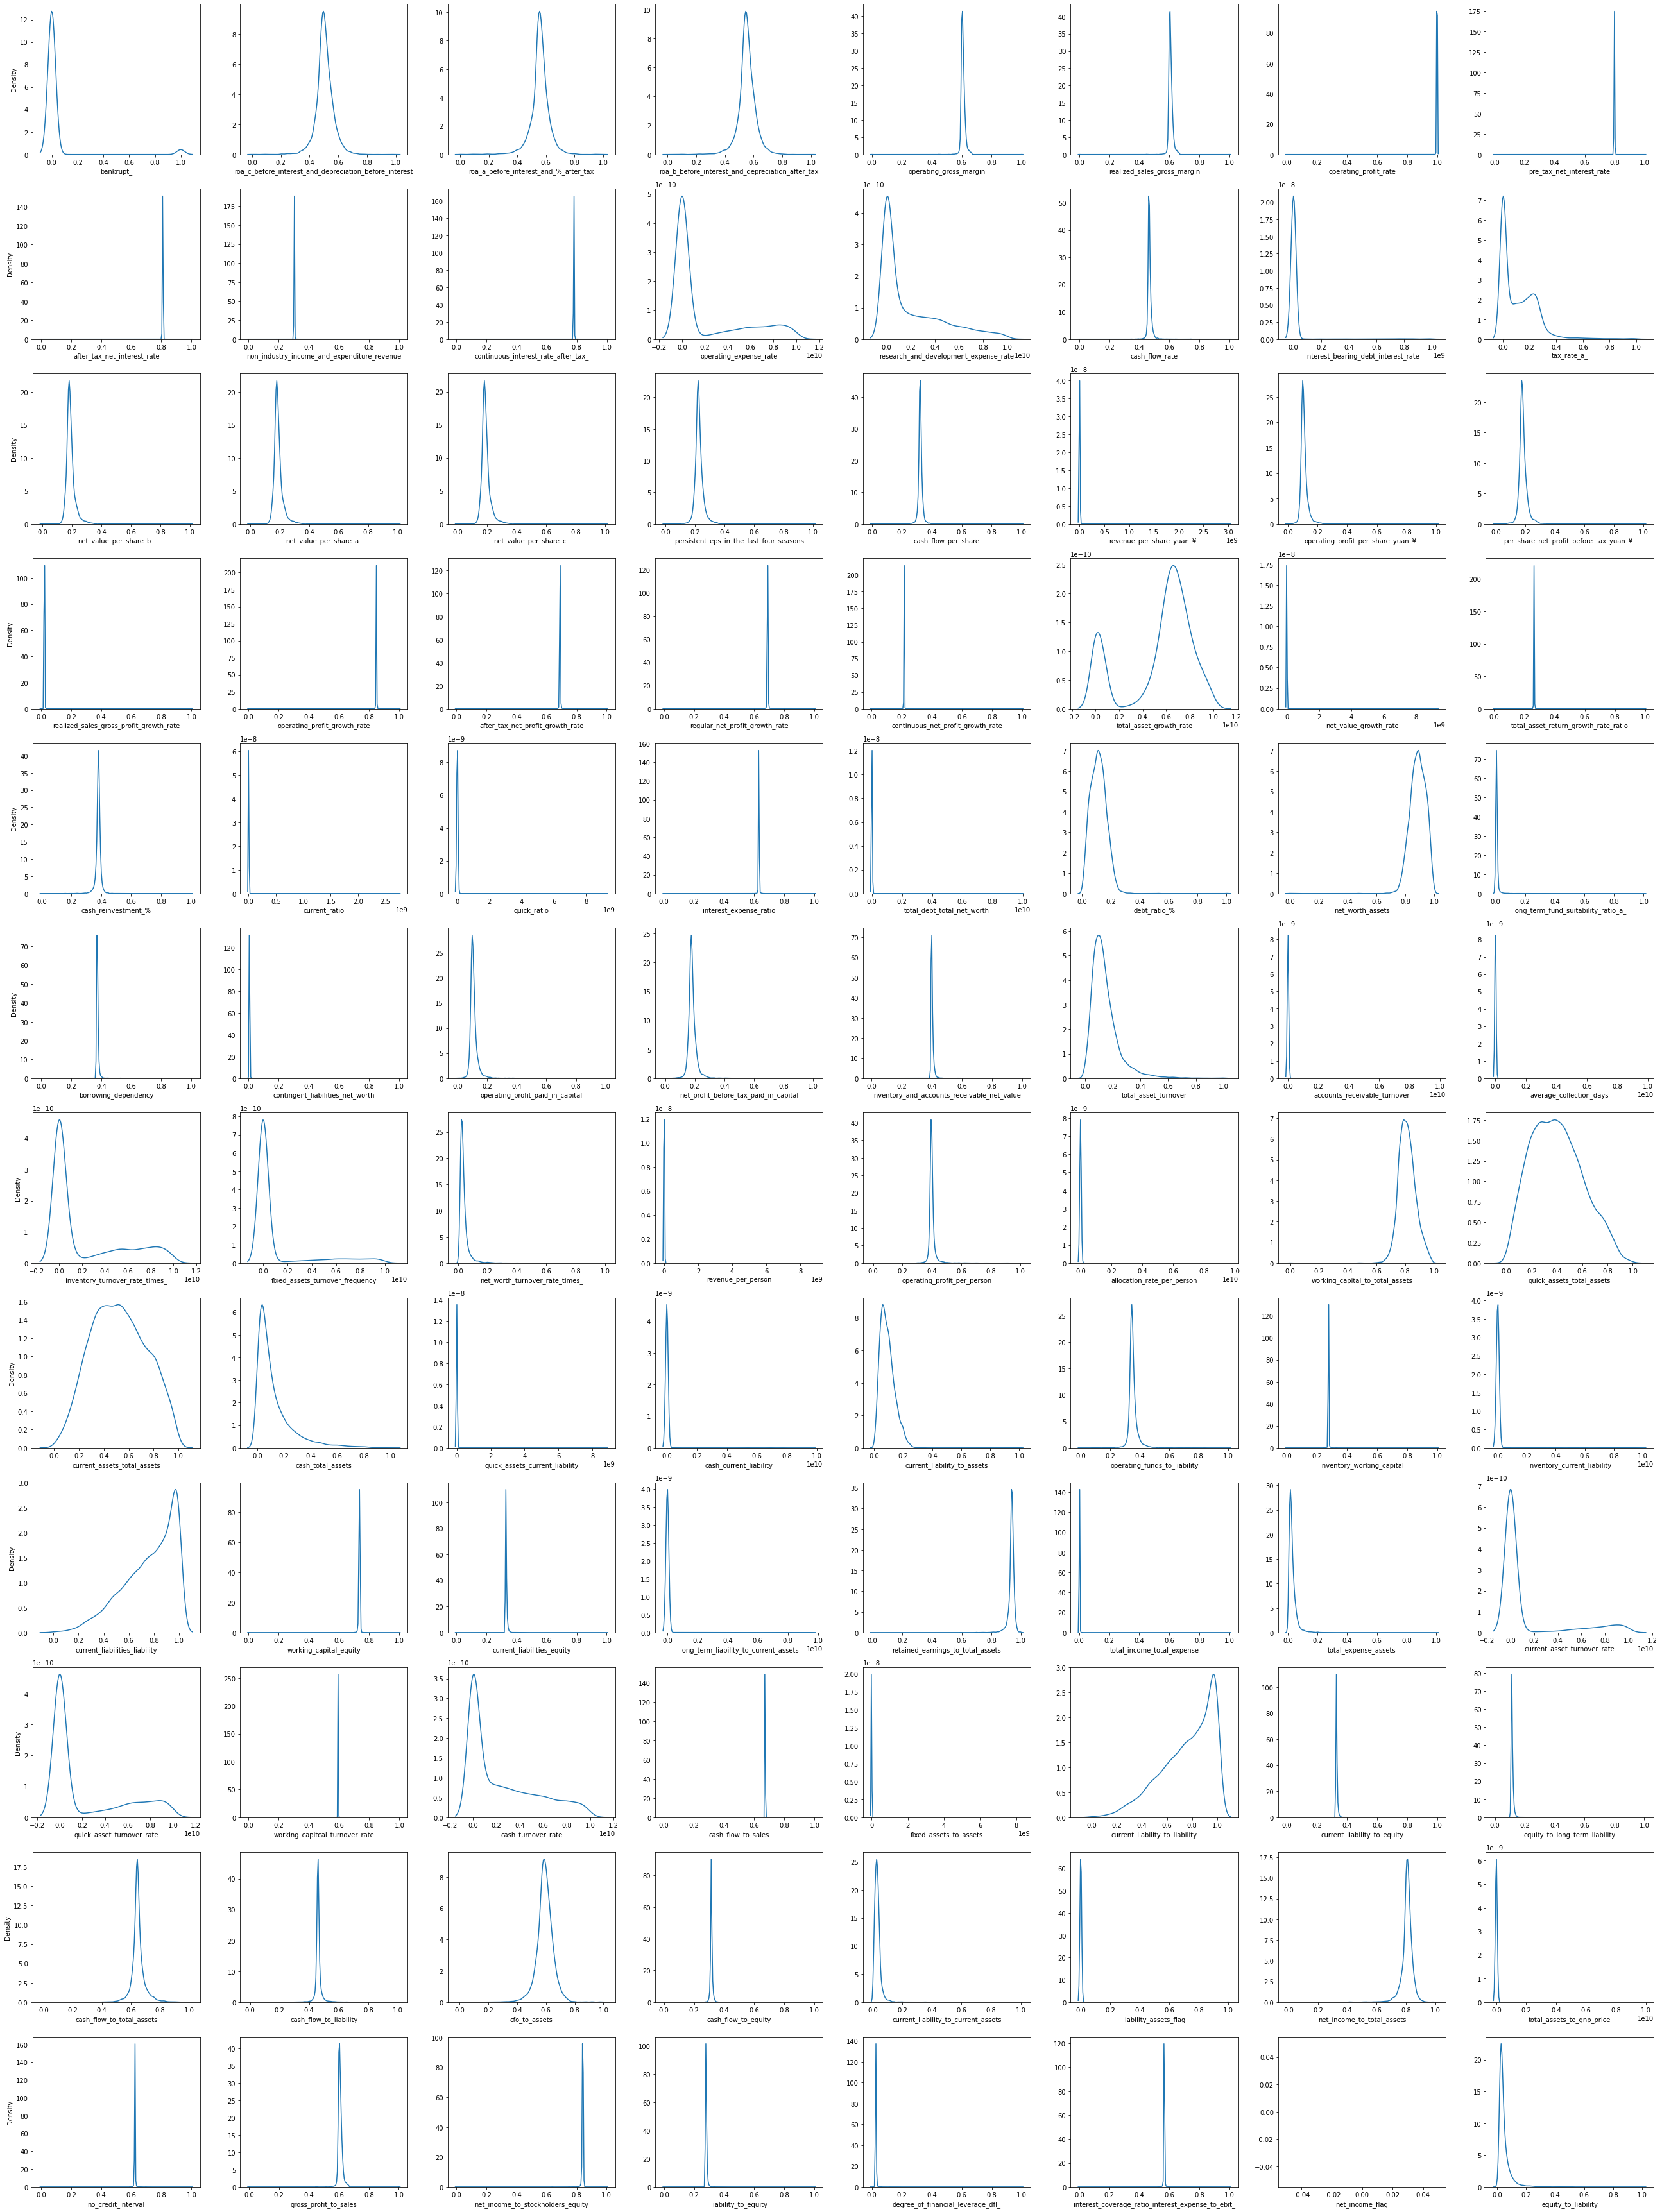

In [11]:
# Visualisation of distributions
cols = list(bankruptcy_df.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_df[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

In [12]:
query_skew=skew_df.query("Skewed == True")["Feature"]
with pd.option_context("display.max_rows", 1000):
    display(query_skew)

0                                             bankrupt_
2                 roa_a_before_interest_and_%_after_tax
3      roa_b_before_interest_and_depreciation_after_tax
4                                operating_gross_margin
5                           realized_sales_gross_margin
6                                 operating_profit_rate
7                             pre_tax_net_interest_rate
8                           after_tax_net_interest_rate
9           non_industry_income_and_expenditure_revenue
10                  continuous_interest_rate_after_tax_
11                               operating_expense_rate
12                research_and_development_expense_rate
13                                       cash_flow_rate
14                  interest_bearing_debt_interest_rate
15                                          tax_rate_a_
16                               net_value_per_share_b_
17                               net_value_per_share_a_
18                               net_value_per_s

**Sub-sample dataset where bankrupt vs non bankrupt is 50/50, after which check for skews an decide if log transform is required, additionally conduct a correlation matrix analysis**

<a id="subsection-three.three"></a>
## **3.3 Subsampling**

Sub-sample dataset where bankrupt vs non bankrupt is 50/50

In [13]:
bankruptcy_df2 = bankruptcy_df.sample(frac=1) #Shuffle Bankruptcy df

bankruptcy_df_b = bankruptcy_df2.loc[bankruptcy_df2["bankrupt_"] == 1]
bankruptcy_df_nb = bankruptcy_df2.loc[bankruptcy_df2["bankrupt_"] == 0][:220]

bankruptcy_subdf_comb = pd.concat([bankruptcy_df_b,bankruptcy_df_nb])
bankruptcy_subdf = bankruptcy_subdf_comb.sample(frac=1,random_state=42)

bankruptcy_subdf

bankrupt_  roa_c_before_interest_and_depreciation_before_interest  \
1686          0                                           0.269000        
2441          1                                           0.361527        
5760          0                                           0.581192        
2067          0                                           0.460927        
6032          0                                           0.434749        
...         ...                                                ...        
1948          1                                           0.431044        
4084          0                                           0.405986        
2954          0                                           0.554770        
4783          0                                           0.528299        
2022          1                                           0.466728        

      roa_a_before_interest_and_%_after_tax  \
1686                               0.264555   
2441                               0.408308   
5760                               0.638519   
2067                               0.521915   
6032                               0.492314   
...                                     ...   
1948                               0.445977   
4084                               0.460587   
2954                               0.600578   
4783                               0.561710   
2022                               0.490078   

      roa_b_before_interest_and_depreciation_after_tax  \
1686                                          0.283634   
2441                                          0.402056   
5760                                          0.618502   
2067                                          0.513411   
6032                                          0.485626   
...                                                ...   
1948                                          0.480218   
4084                                          0.452166   
2954                                          0.594197   
4783                                          0.572729   
2022                                          0.501097   

      operating_gross_margin  realized_sales_gross_margin  \
1686                0.599014                     0.599014   
2441                0.602034                     0.602034   
5760                0.614696                     0.614847   
2067                0.608837                     0.608837   
6032                0.598956                     0.598964   
...                      ...                          ...   
1948                0.578648                     0.578648   
4084                0.594171                     0.594150   
2954                0.606156                     0.606156   
4783                0.608239                     0.609197   
2022                0.607850                     0.607850   

      operating_profit_rate  pre_tax_net_interest_rate  \
1686               0.973424                   0.752969   
2441               0.998996                   0.796316   
5760               0.999147                   0.797635   
2067               0.998978                   0.797312   
6032               0.998860                   0.797202   
...                     ...                        ...   
1948               0.998496                   0.796746   
4084               0.998863                   0.797139   
2954               0.999083                   0.797584   
4783               0.999086                   0.797547   
2022               0.998855                   0.797196   

      after_tax_net_interest_rate  \
1686                     0.766198   
2441                     0.808291   
5760                     0.809500   
2067                     0.809251   
6032                     0.809144   
...                           ...   
1948                     0.808710   
4084                     0.809094   
2954                     0.809459   
4783                     0.809445   
2022  

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bankrupt_', ylabel='count'>

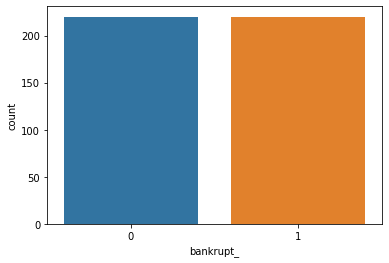

In [14]:
sns.countplot(bankruptcy_subdf["bankrupt_"])

220 randomly selected non bankruptcy companies were selected against 220 bankrupt companies.

<a id="section-four"></a>
# **4. Feature Engineering**

In [15]:
bankruptcy_subdf2 = bankruptcy_subdf.drop(["net_income_flag"],axis=1)
bankruptcy_subdf2.shape

(440, 95)

<a id="subsection-four.one"></a>
## **4.1 Correlation Matrix**

<AxesSubplot:>

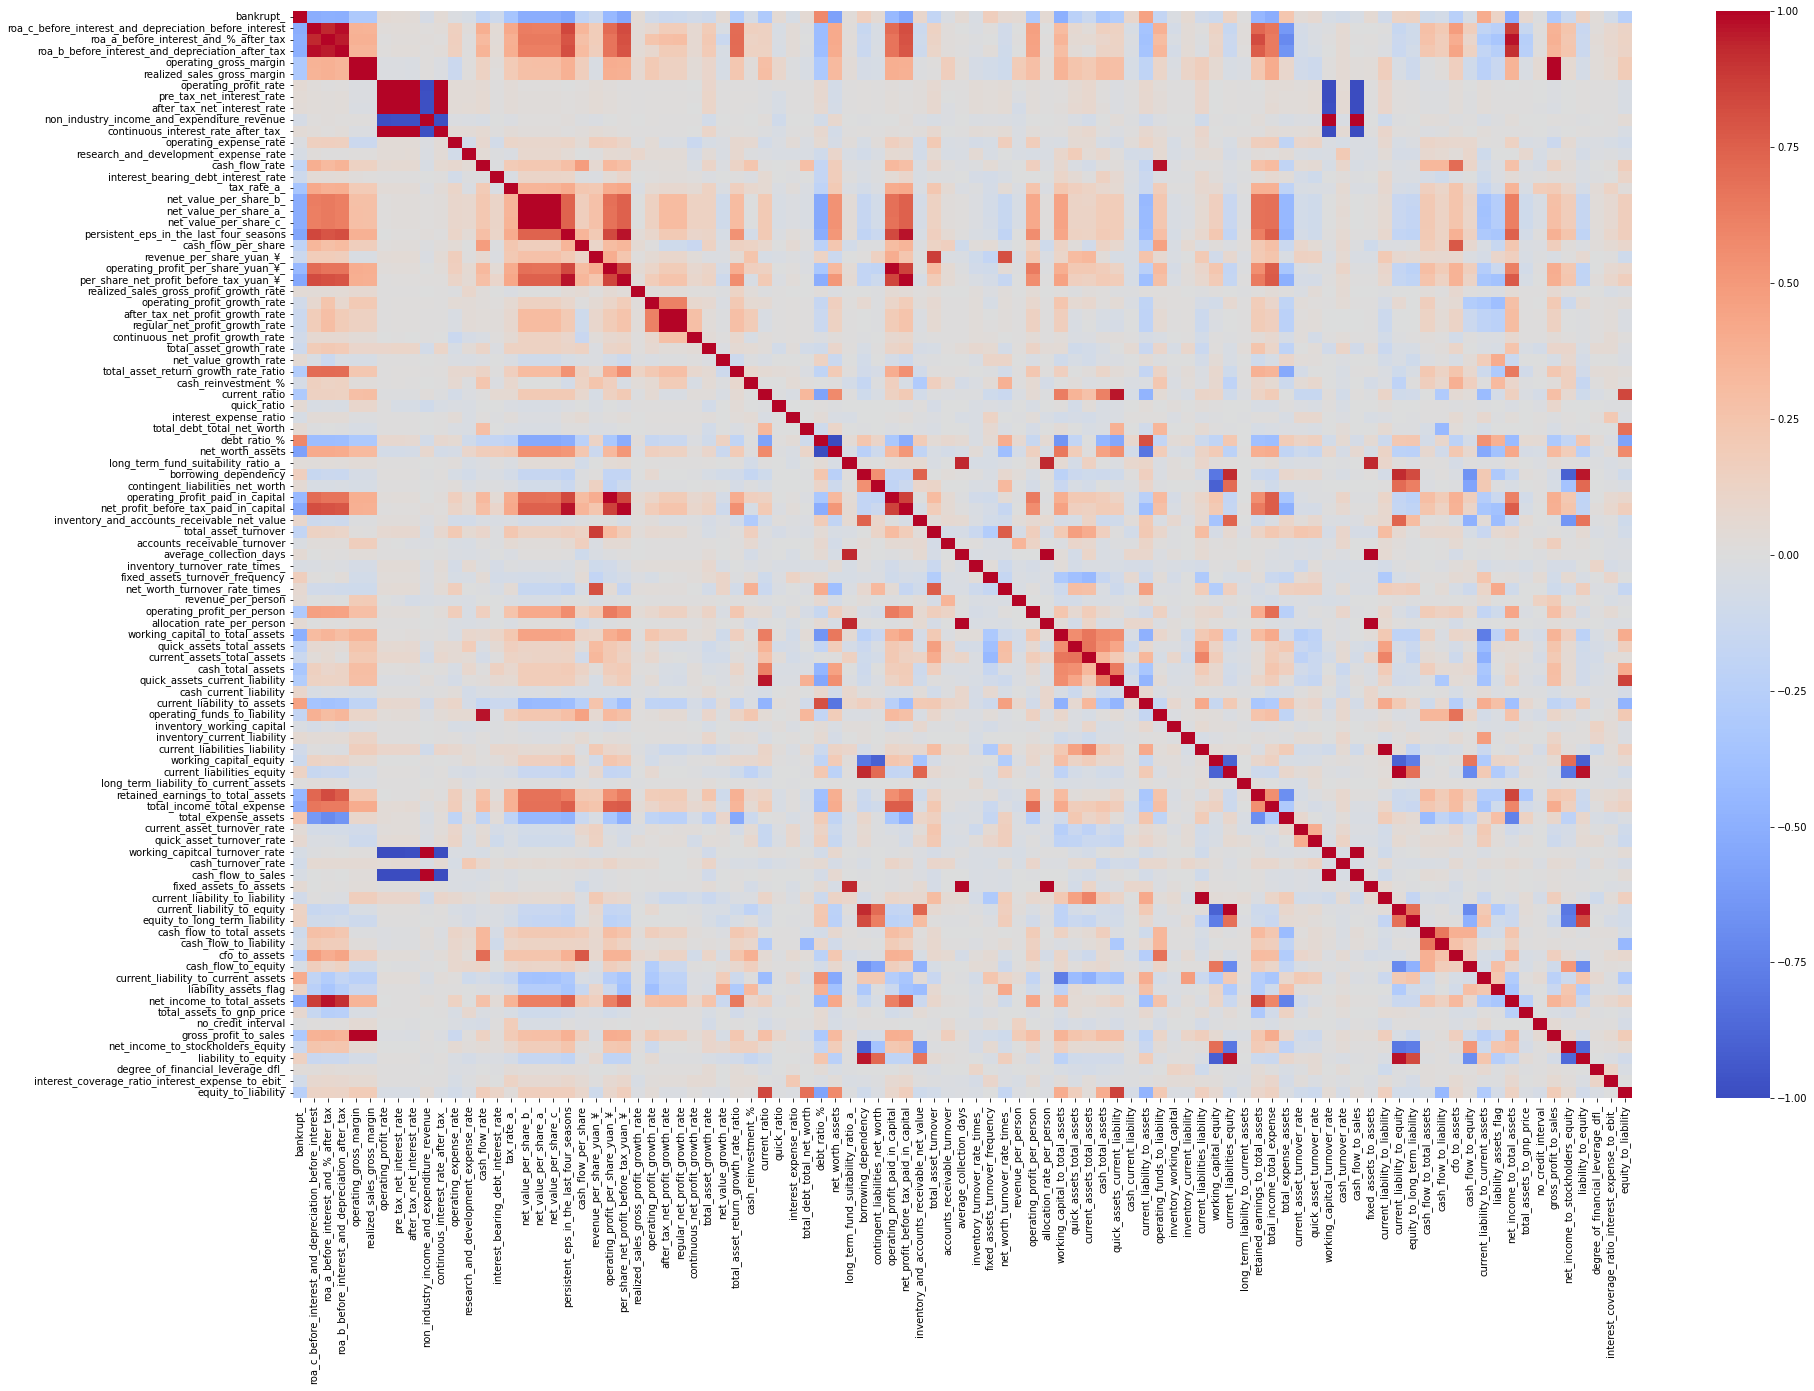

In [16]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(bankruptcy_subdf2.corr(),ax=ax1,cmap="coolwarm")

### **4.1.1 IDENTIFY HIGHEST FEATURES CORRELATED TO BANKRUPTCY**

Based on fundamental understanding of businesses that go bankrupt are few assets, high debt, low profitability and low cash flow. Can look in this direction

In [17]:
corr=bankruptcy_subdf2[bankruptcy_subdf2.columns[:-1]].corr()['bankrupt_'][:]

corr_df = pd.DataFrame(corr)

print("Correlations to Bankruptcy:")
for index, row in corr_df["bankrupt_"].iteritems():
    if row!=1.0 and row>=0.5:
        print(f'Positive Correlation: {index}')
    elif row!=1.0 and row<=-0.5:
        print(f'Negative Correlation: {index}')

Correlations to Bankruptcy:
Negative Correlation: roa_c_before_interest_and_depreciation_before_interest
Negative Correlation: roa_b_before_interest_and_depreciation_after_tax
Negative Correlation: net_value_per_share_b_
Negative Correlation: net_value_per_share_a_
Negative Correlation: net_value_per_share_c_
Negative Correlation: persistent_eps_in_the_last_four_seasons
Negative Correlation: per_share_net_profit_before_tax_yuan_¥_
Positive Correlation: debt_ratio_%
Negative Correlation: net_worth_assets
Negative Correlation: net_profit_before_tax_paid_in_capital
Negative Correlation: total_income_total_expense


**Description of what these features represent**

roa_c_before_interest_and_depreciation_before_interest: Return on total assets- if return on total assets is low, higher risk of bankruptcy\
roa_a_before_interest_and_after_tax: Return on total assets- if return on total assets is low, higher risk of bankruptcy\
roa_b_before_interest_and_depreciation_after_tax: Return on total assets- if return on total assets is low, higher risk of bankruptcy\
debt_ratio: Liability over total assets - higher the value, the higher amount of debt over assets, which leads to higher risk of bankruptcy\
net_worth_assets: Lesser net assets, higher risk of bankruptcy\
retained_earnings_to_total_assets: Lesser earning retained higher risk of bankruptcy\
total_income_total_expense: Lower amount of income to expenses, higher risk of bankruptcy\
net_income_to_total_assets: Lower amount of net income results in higher risk of bankruptcy\

Features seems to agree with background knowledge on issues that will lead to companies defaulting

<a id="subsection-four.two"></a>
## **4.2 Visualisation of Distribution of All Features After Sub-Sampling**

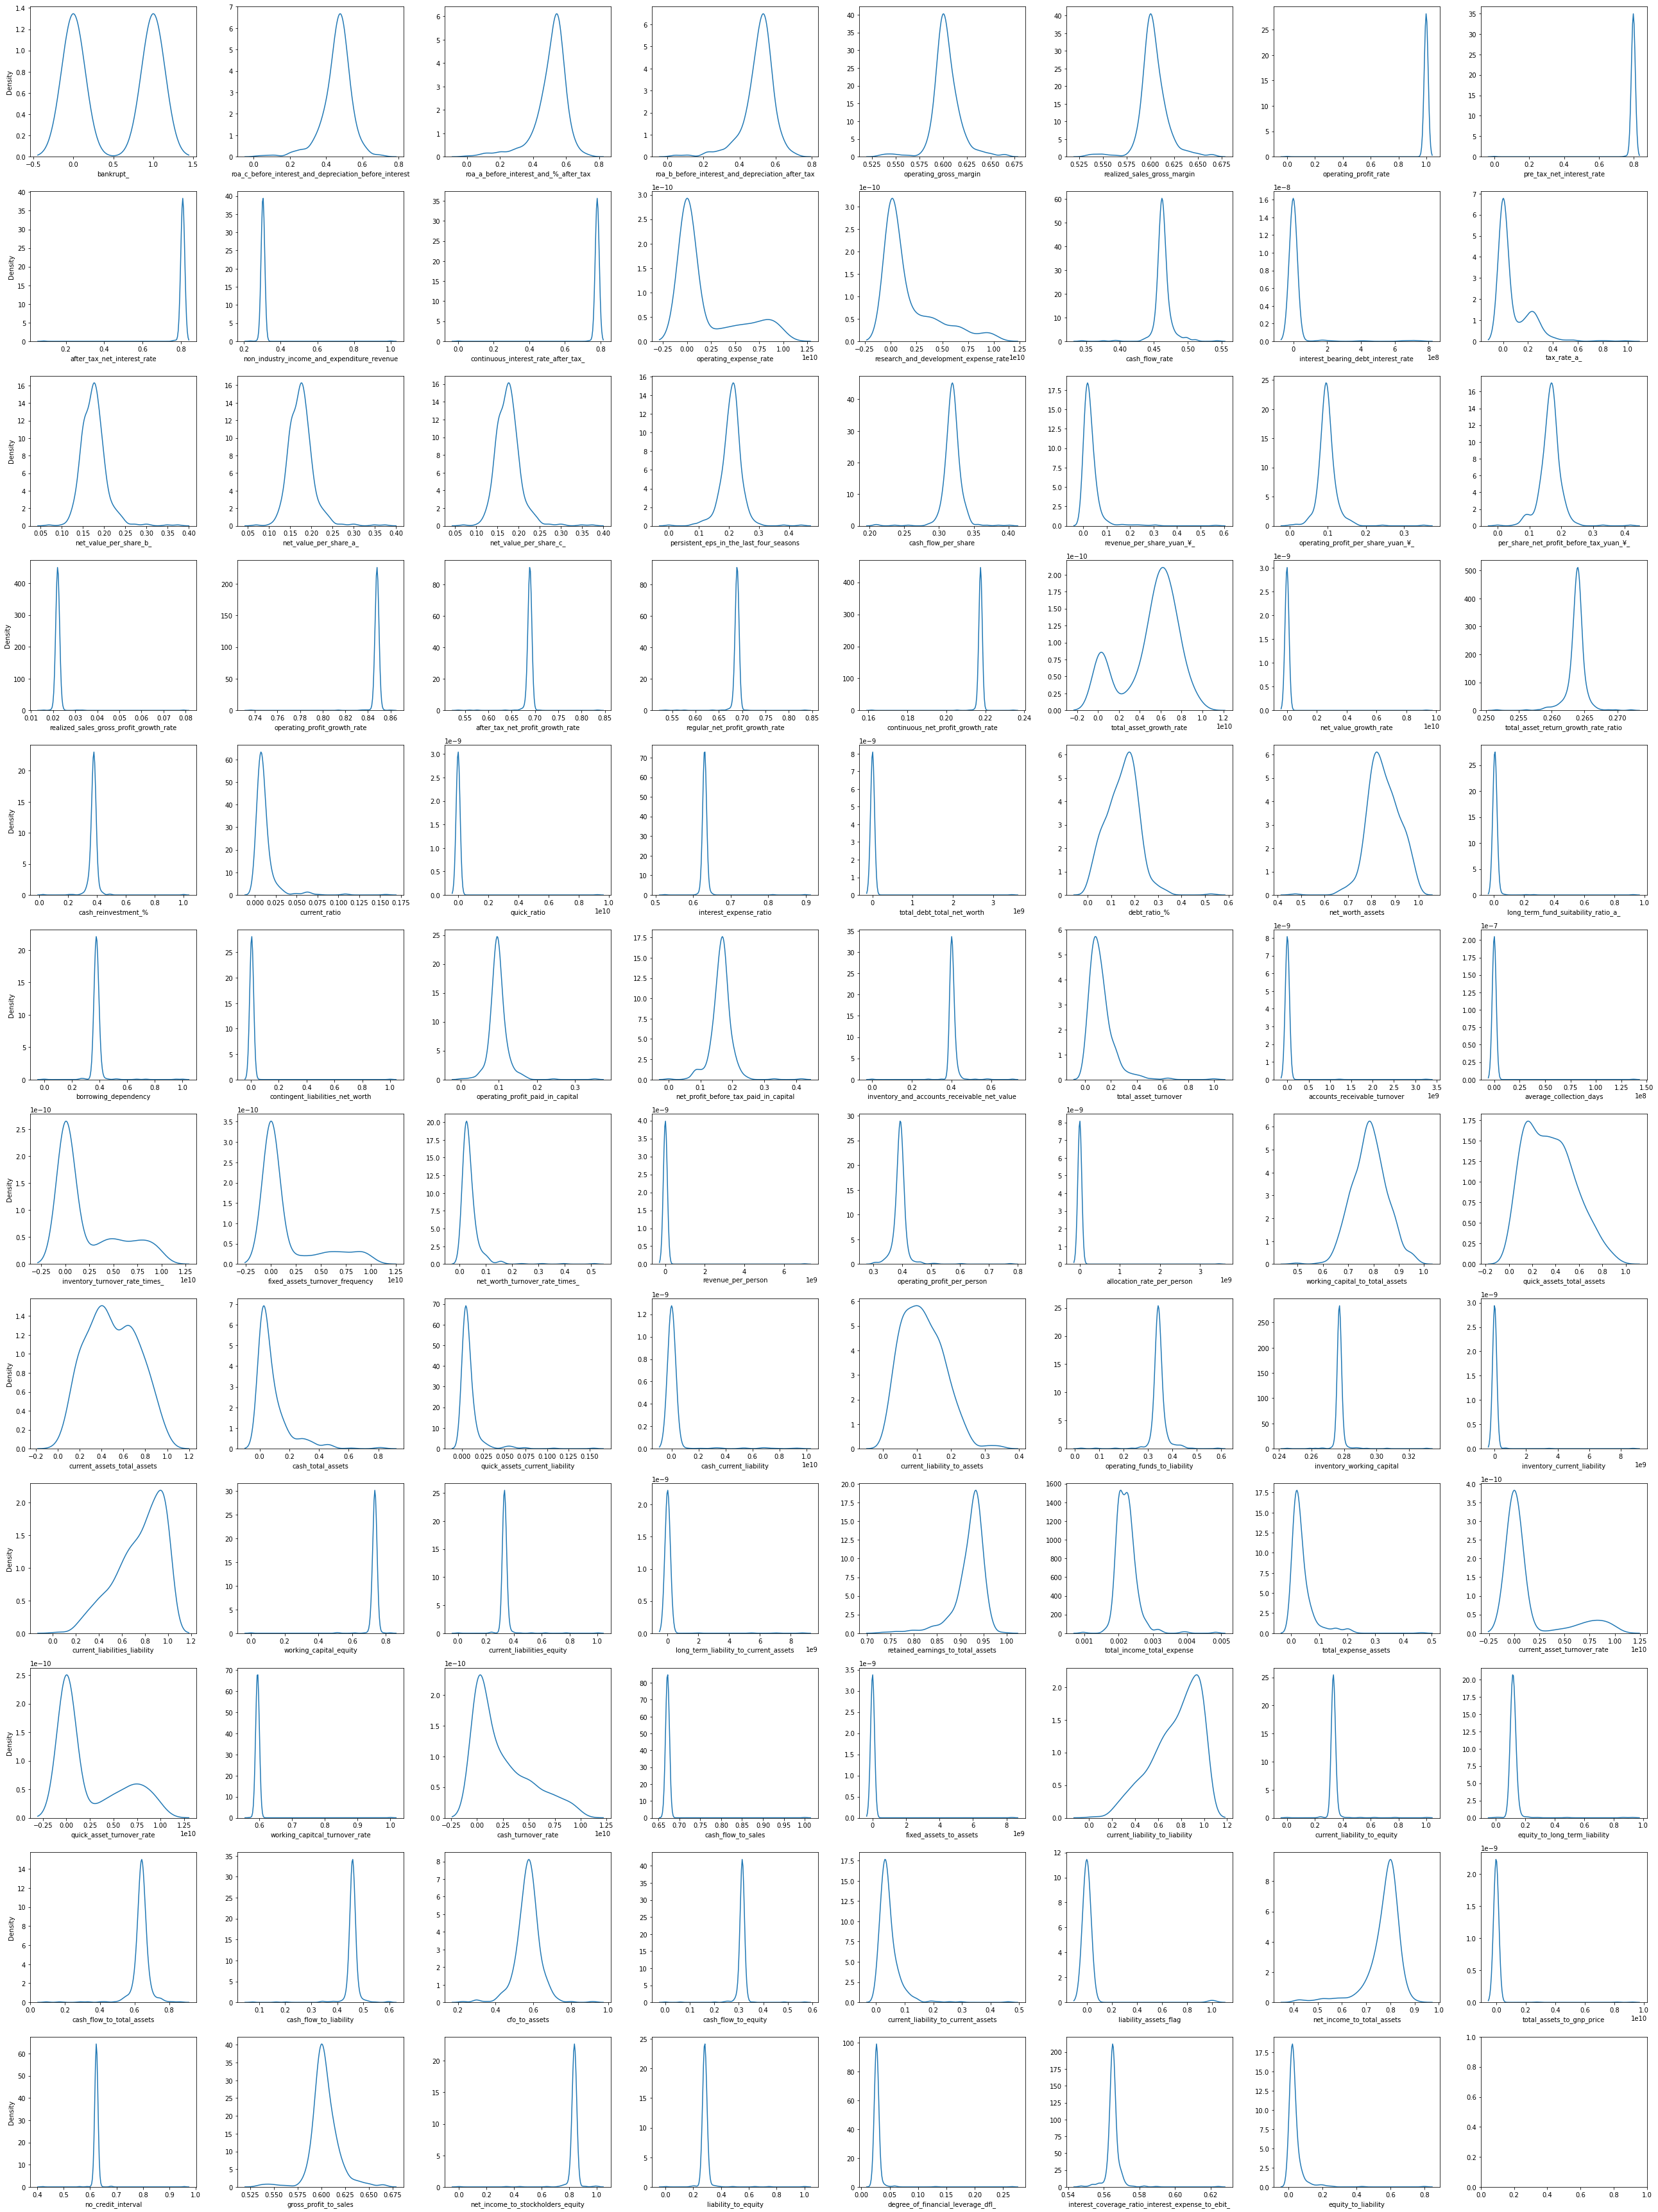

In [18]:
# Visualisation of distributions after sub-sampling
cols = list(bankruptcy_subdf2.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_subdf2[cols[i]], ax = ax[i // ncols, i % ncols])
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

<a id="subsection-four.three"></a>
## **4.3 Boxplot of All Features**

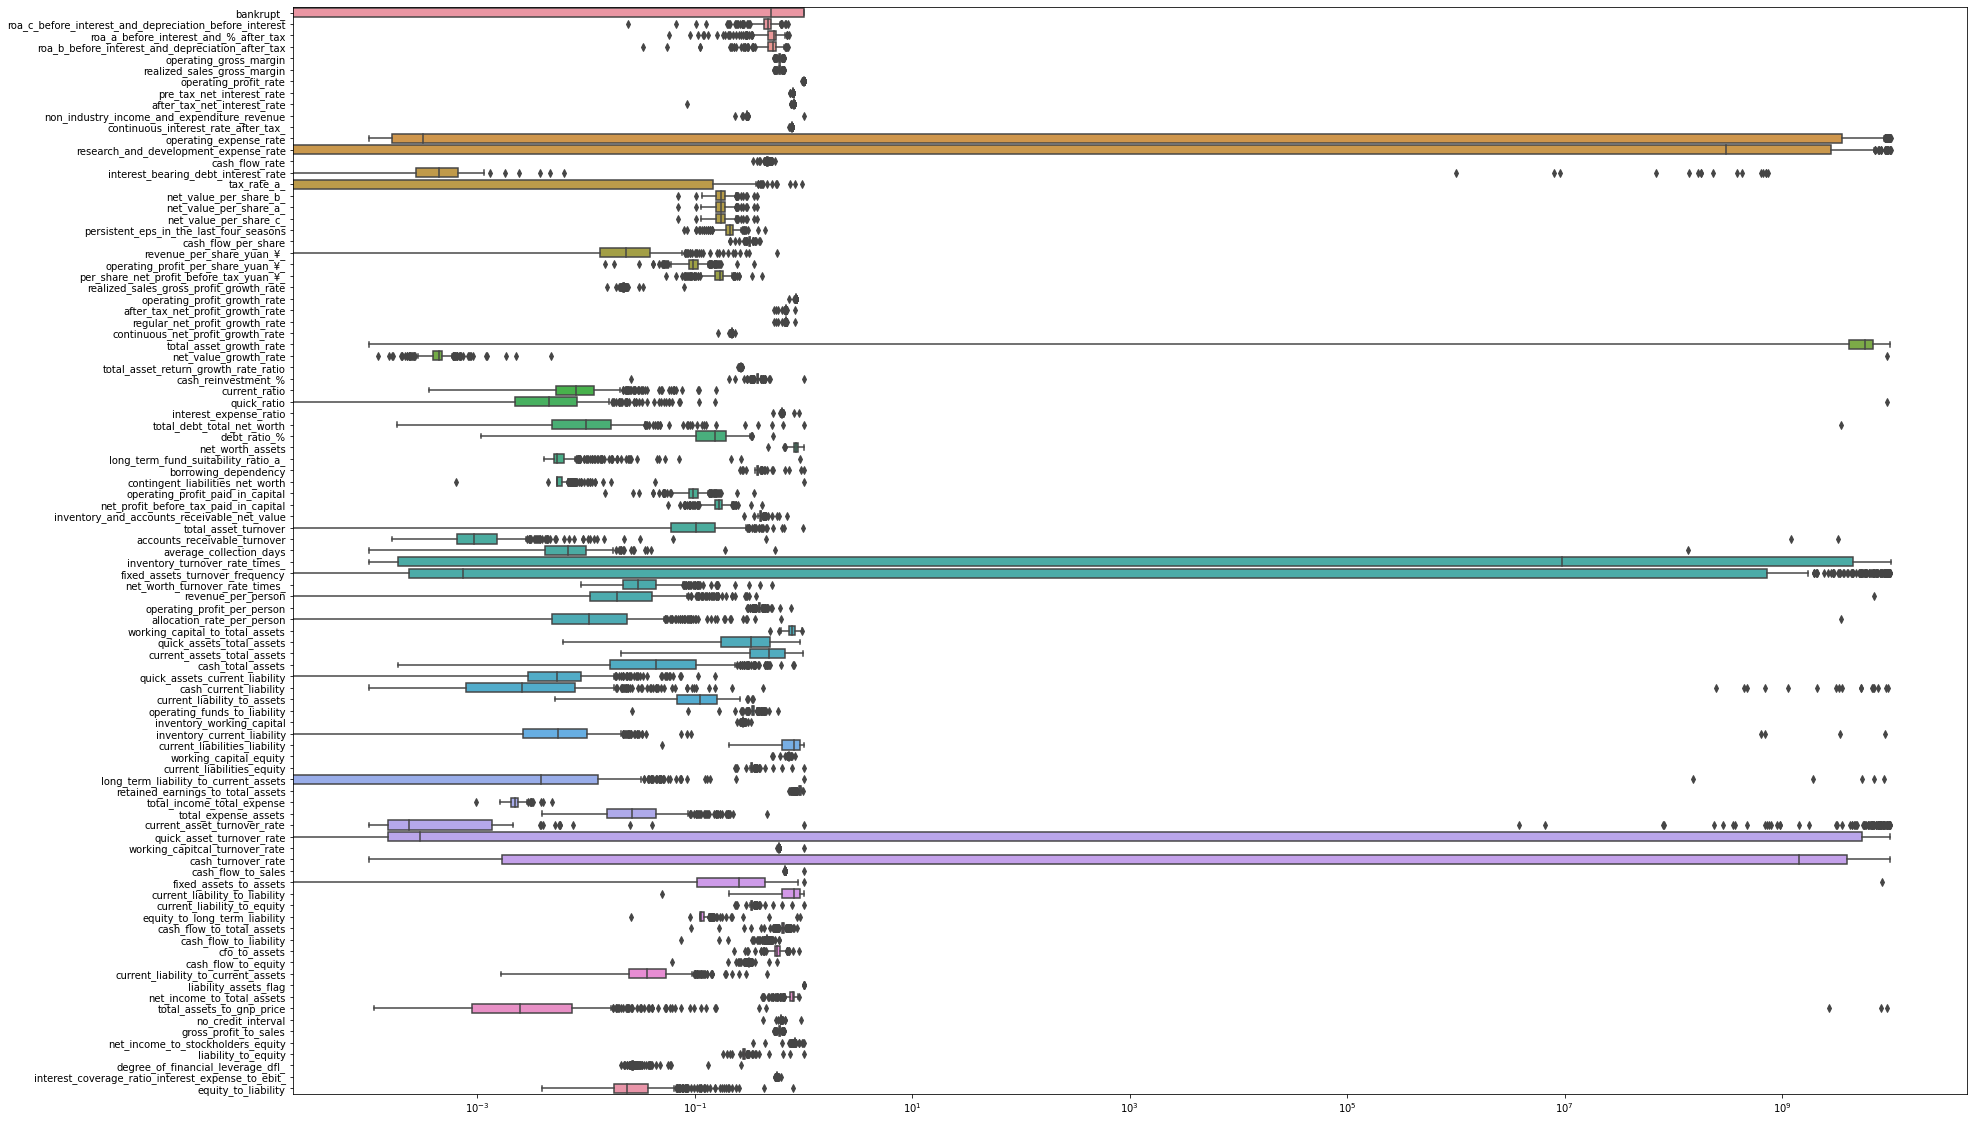

In [19]:
plt.figure(figsize=(30,20))
boxplot=sns.boxplot(data=bankruptcy_subdf2,orient="h")
boxplot.set(xscale="log")
plt.show()

<a id="subsection-four.four"></a>
## **4.4 Drop Outliers**

In [20]:
quartile1 = bankruptcy_subdf2.quantile(q=0.25,axis=0)
# display(quartile1)
quartile3 = bankruptcy_subdf2.quantile(q=0.75,axis=0)
# display(quartile3)
IQR = quartile3 -quartile1
lower_limit = quartile1-1.5*IQR
upper_limit = quartile3+1.5*IQR

lower_limit = lower_limit.drop(["bankrupt_"])
upper_limit = upper_limit.drop(["bankrupt_"])
# print(lower_limit)
# print(" ")
# print(upper_limit)

bankruptcy_subdf2_out = bankruptcy_subdf2[((bankruptcy_subdf2<lower_limit) | (bankruptcy_subdf2>upper_limit)).any(axis=1)]
display(bankruptcy_subdf2_out.shape)
display(bankruptcy_subdf2.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  from ipykernel import kernelapp as app


(419, 95)

(440, 95)

In [21]:
bankruptcy_subdf3 = bankruptcy_subdf2_out.copy()
bankruptcy_subdf3

bankrupt_  roa_c_before_interest_and_depreciation_before_interest  \
1686          0                                           0.269000        
2441          1                                           0.361527        
5760          0                                           0.581192        
2067          0                                           0.460927        
6032          0                                           0.434749        
...         ...                                                ...        
2026          1                                           0.386584        
1948          1                                           0.431044        
4084          0                                           0.405986        
2954          0                                           0.554770        
2022          1                                           0.466728        

      roa_a_before_interest_and_%_after_tax  \
1686                               0.264555   
2441                               0.408308   
5760                               0.638519   
2067                               0.521915   
6032                               0.492314   
...                                     ...   
2026                               0.463966   
1948                               0.445977   
4084                               0.460587   
2954                               0.600578   
2022                               0.490078   

      roa_b_before_interest_and_depreciation_after_tax  \
1686                                          0.283634   
2441                                          0.402056   
5760                                          0.618502   
2067                                          0.513411   
6032                                          0.485626   
...                                                ...   
2026                                          0.452594   
1948                                          0.480218   
4084                                          0.452166   
2954                                          0.594197   
2022                                          0.501097   

      operating_gross_margin  realized_sales_gross_margin  \
1686                0.599014                     0.599014   
2441                0.602034                     0.602034   
5760                0.614696                     0.614847   
2067                0.608837                     0.608837   
6032                0.598956                     0.598964   
...                      ...                          ...   
2026                0.598820                     0.598820   
1948                0.578648                     0.578648   
4084                0.594171                     0.594150   
2954                0.606156                     0.606156   
2022                0.607850                     0.607850   

      operating_profit_rate  pre_tax_net_interest_rate  \
1686               0.973424                   0.752969   
2441               0.998996                   0.796316   
5760               0.999147                   0.797635   
2067               0.998978                   0.797312   
6032               0.998860                   0.797202   
...                     ...                        ...   
2026               0.998926                   0.797248   
1948               0.998496                   0.796746   
4084               0.998863                   0.797139   
2954               0.999083                   0.797584   
2022               0.998855                   0.797196   

      after_tax_net_interest_rate  \
1686                     0.766198   
2441                     0.808291   
5760                     0.809500   
2067                     0.809251   
6032                     0.809144   
...                           ...   
2026                     0.809209   
1948                     0.808710   
4084                     0.809094   
2954                     0.809459   
2022  

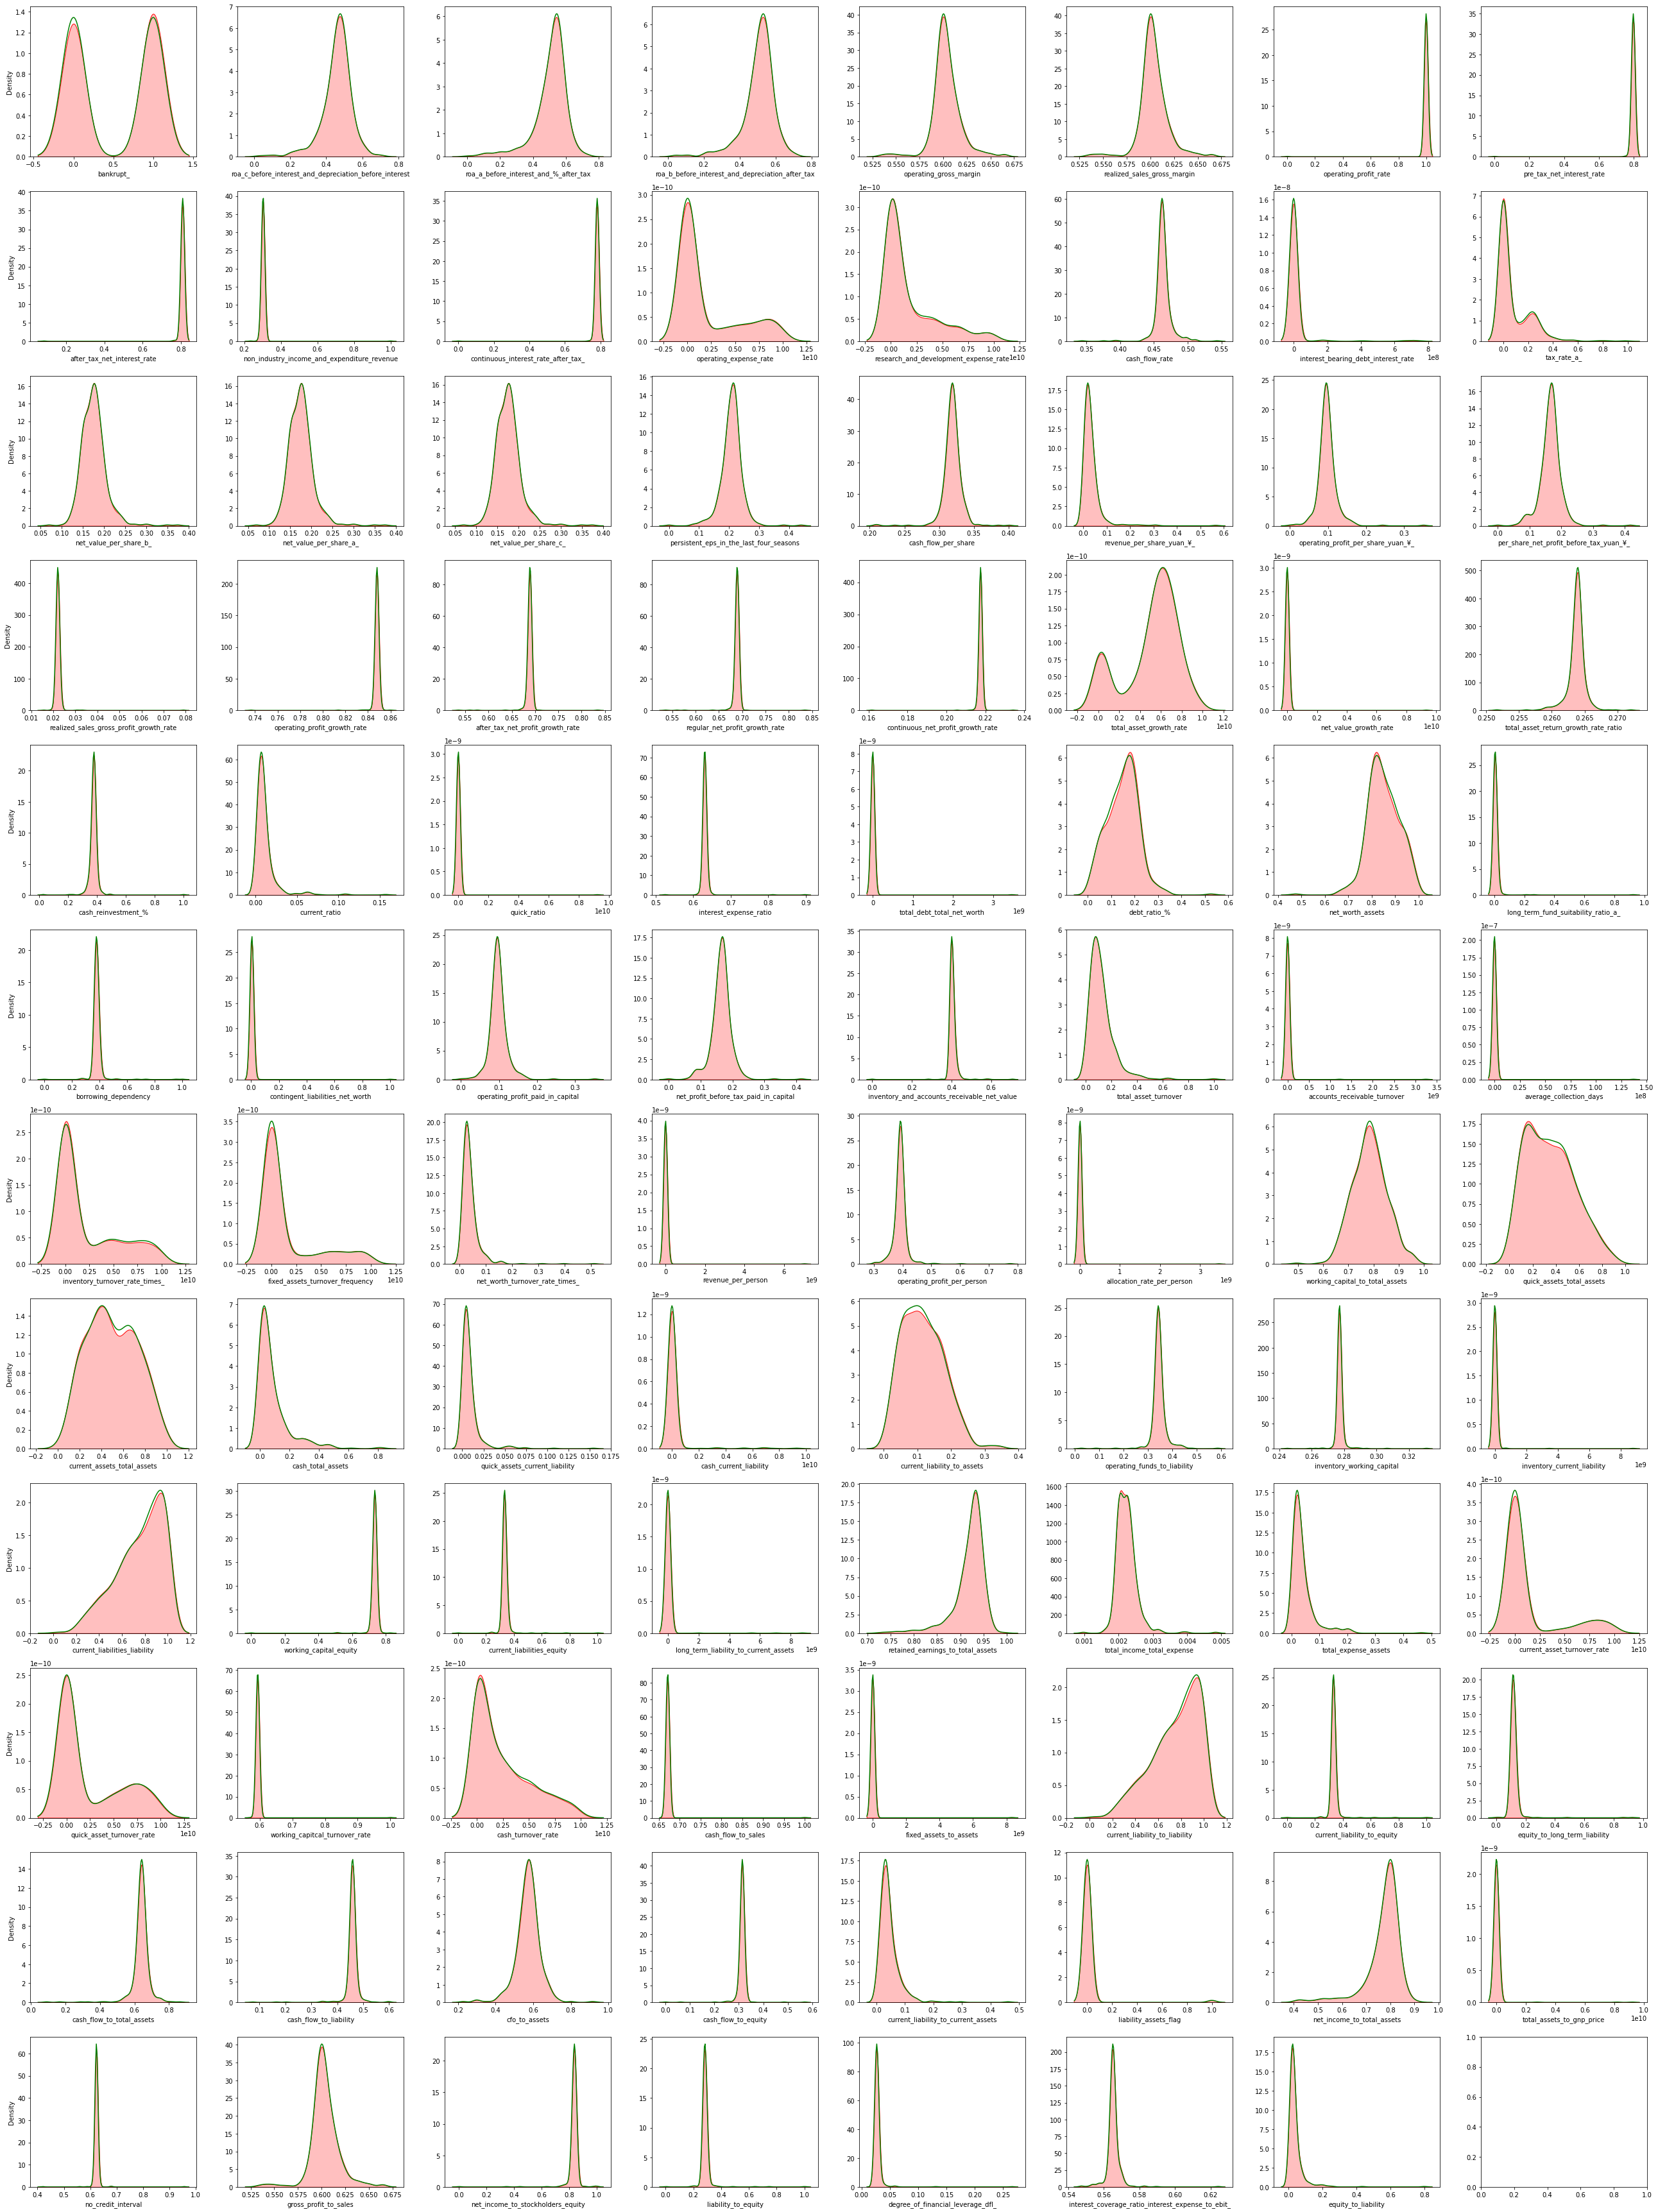

In [22]:
# Visualisation of distributions after sub-sampling after outlier removal
cols = list(bankruptcy_subdf3.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_subdf3[cols[i]], ax = ax[i // ncols, i % ncols],fill=True,color="red")
    sns.kdeplot(bankruptcy_subdf2[cols[i]], ax = ax[i // ncols, i % ncols],color="green")
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()

<a id="section-five"></a>
# **5.0 Data Preprocessing**

<a id="subsection-five.one"></a>
## **5.1 Feature Encoding**
All categoricals already encoded in base data

<a id="subsection-five.two"></a>
## **5.2 Log Transformation**

To distribute the data, removing skews

In [23]:
# Log transform to remove skews

target = bankruptcy_subdf3['bankrupt_']
bankruptcy_subdf4 = bankruptcy_subdf3.drop(["bankrupt_"],axis=1)

def log_trans(data):
    for col in data:
        skew = data[col].skew()
        if skew>=0.5 or skew<=0.5:
            data[col] = np.log1p(data[col])
        else:
            continue
    return data

bankruptcy_subdf4_log = log_trans(bankruptcy_subdf4)
bankruptcy_subdf4_log.head()

roa_c_before_interest_and_depreciation_before_interest  \
1686                                           0.238229        
2441                                           0.308607        
5760                                           0.458179        
2067                                           0.379071        
6032                                           0.360990        

      roa_a_before_interest_and_%_after_tax  \
1686                               0.234720   
2441                               0.342389   
5760                               0.493793   
2067                               0.419969   
6032                               0.400328   

      roa_b_before_interest_and_depreciation_after_tax  \
1686                                          0.249695   
2441                                          0.337940   
5760                                          0.481501   
2067                                          0.414366   
6032                                          0.395836   

      operating_gross_margin  realized_sales_gross_margin  \
1686                0.469387                     0.469387   
2441                0.471274                     0.471274   
5760                0.479147                     0.479240   
2067                0.475512                     0.475512   
6032                0.469351                     0.469356   

      operating_profit_rate  pre_tax_net_interest_rate  \
1686               0.679770                   0.561311   
2441               0.692645                   0.585738   
5760               0.692721                   0.586472   
2067               0.692636                   0.586292   
6032               0.692577                   0.586231   

      after_tax_net_interest_rate  \
1686                     0.568829   
2441                     0.592382   
5760                     0.593050   
2067                     0.592913   
6032                     0.592854   

      non_industry_income_and_expenditure_revenue  \
1686                                     0.246352   
2441                                     0.263590   
5760                                     0.265115   
2067                                     0.264953   
6032                                     0.264994   

      continuous_interest_rate_after_tax_  ...  liability_assets_flag  \
1686                             0.551061  ...                    0.0   
2441                             0.576875  ...                    0.0   
5760                             0.577600  ...                    0.0   
2067                             0.577482  ...                    0.0   
6032                             0.577394  ...                    0.0   

      net_income_to_total_assets  total_assets_to_gnp_price  \
1686                    0.519887                   0.000407   
2441                    0.542094                   0.005455   
5760                    0.619374                   0.000645   
2067                    0.581582                   0.000941   
6032                    0.571630                   0.003539   

      no_credit_interval  gross_profit_to_sales  \
1686            0.484740               0.469388   
2441            0.482968               0.471275   
5760            0.484985               0.479144   
2067            0.484425               0.475510   
6032            0.484953               0.469351   

      net_income_to_stockholders_equity  liability_to_equity  \
1686                           0.606255             0.243934   
2441                           0.604134             0.252817   
5760                           0.611857             0.244477   
2067                           0.609368             0.249811   
6032                           0.608799             0.245789   

      degree_of_financial_leverage_dfl_  \
1686                           0.026438   
2441                           0.026421   
5760                           0.026439   
2067                           0.026182   
6032  

### 5.2.1 Box Plot of Log Transformed Data

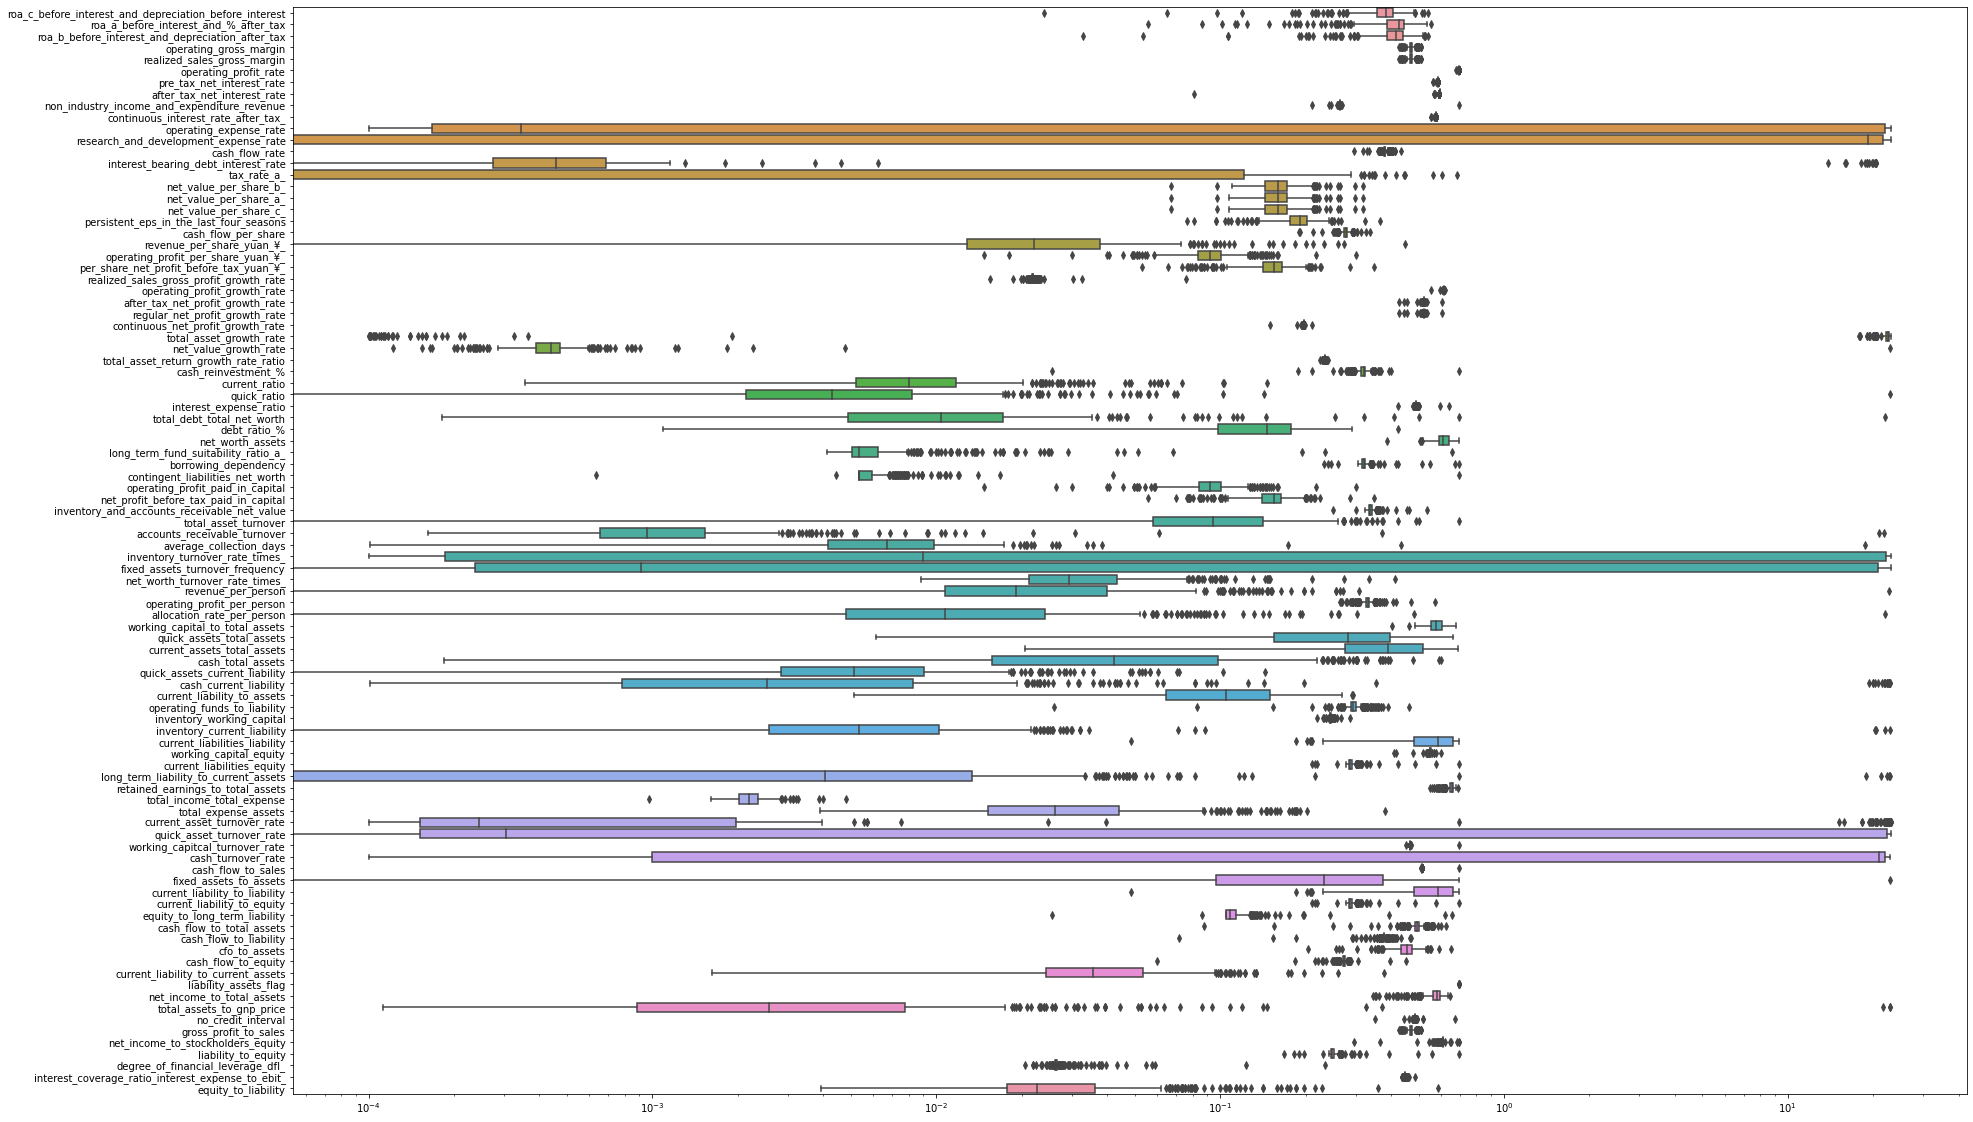

In [24]:
plt.figure(figsize=(30,20))
boxplot=sns.boxplot(data=bankruptcy_subdf4_log,orient="h")
boxplot.set(xscale="log")
plt.show()

### 5.2.2 Distribution of Log Data Visualise

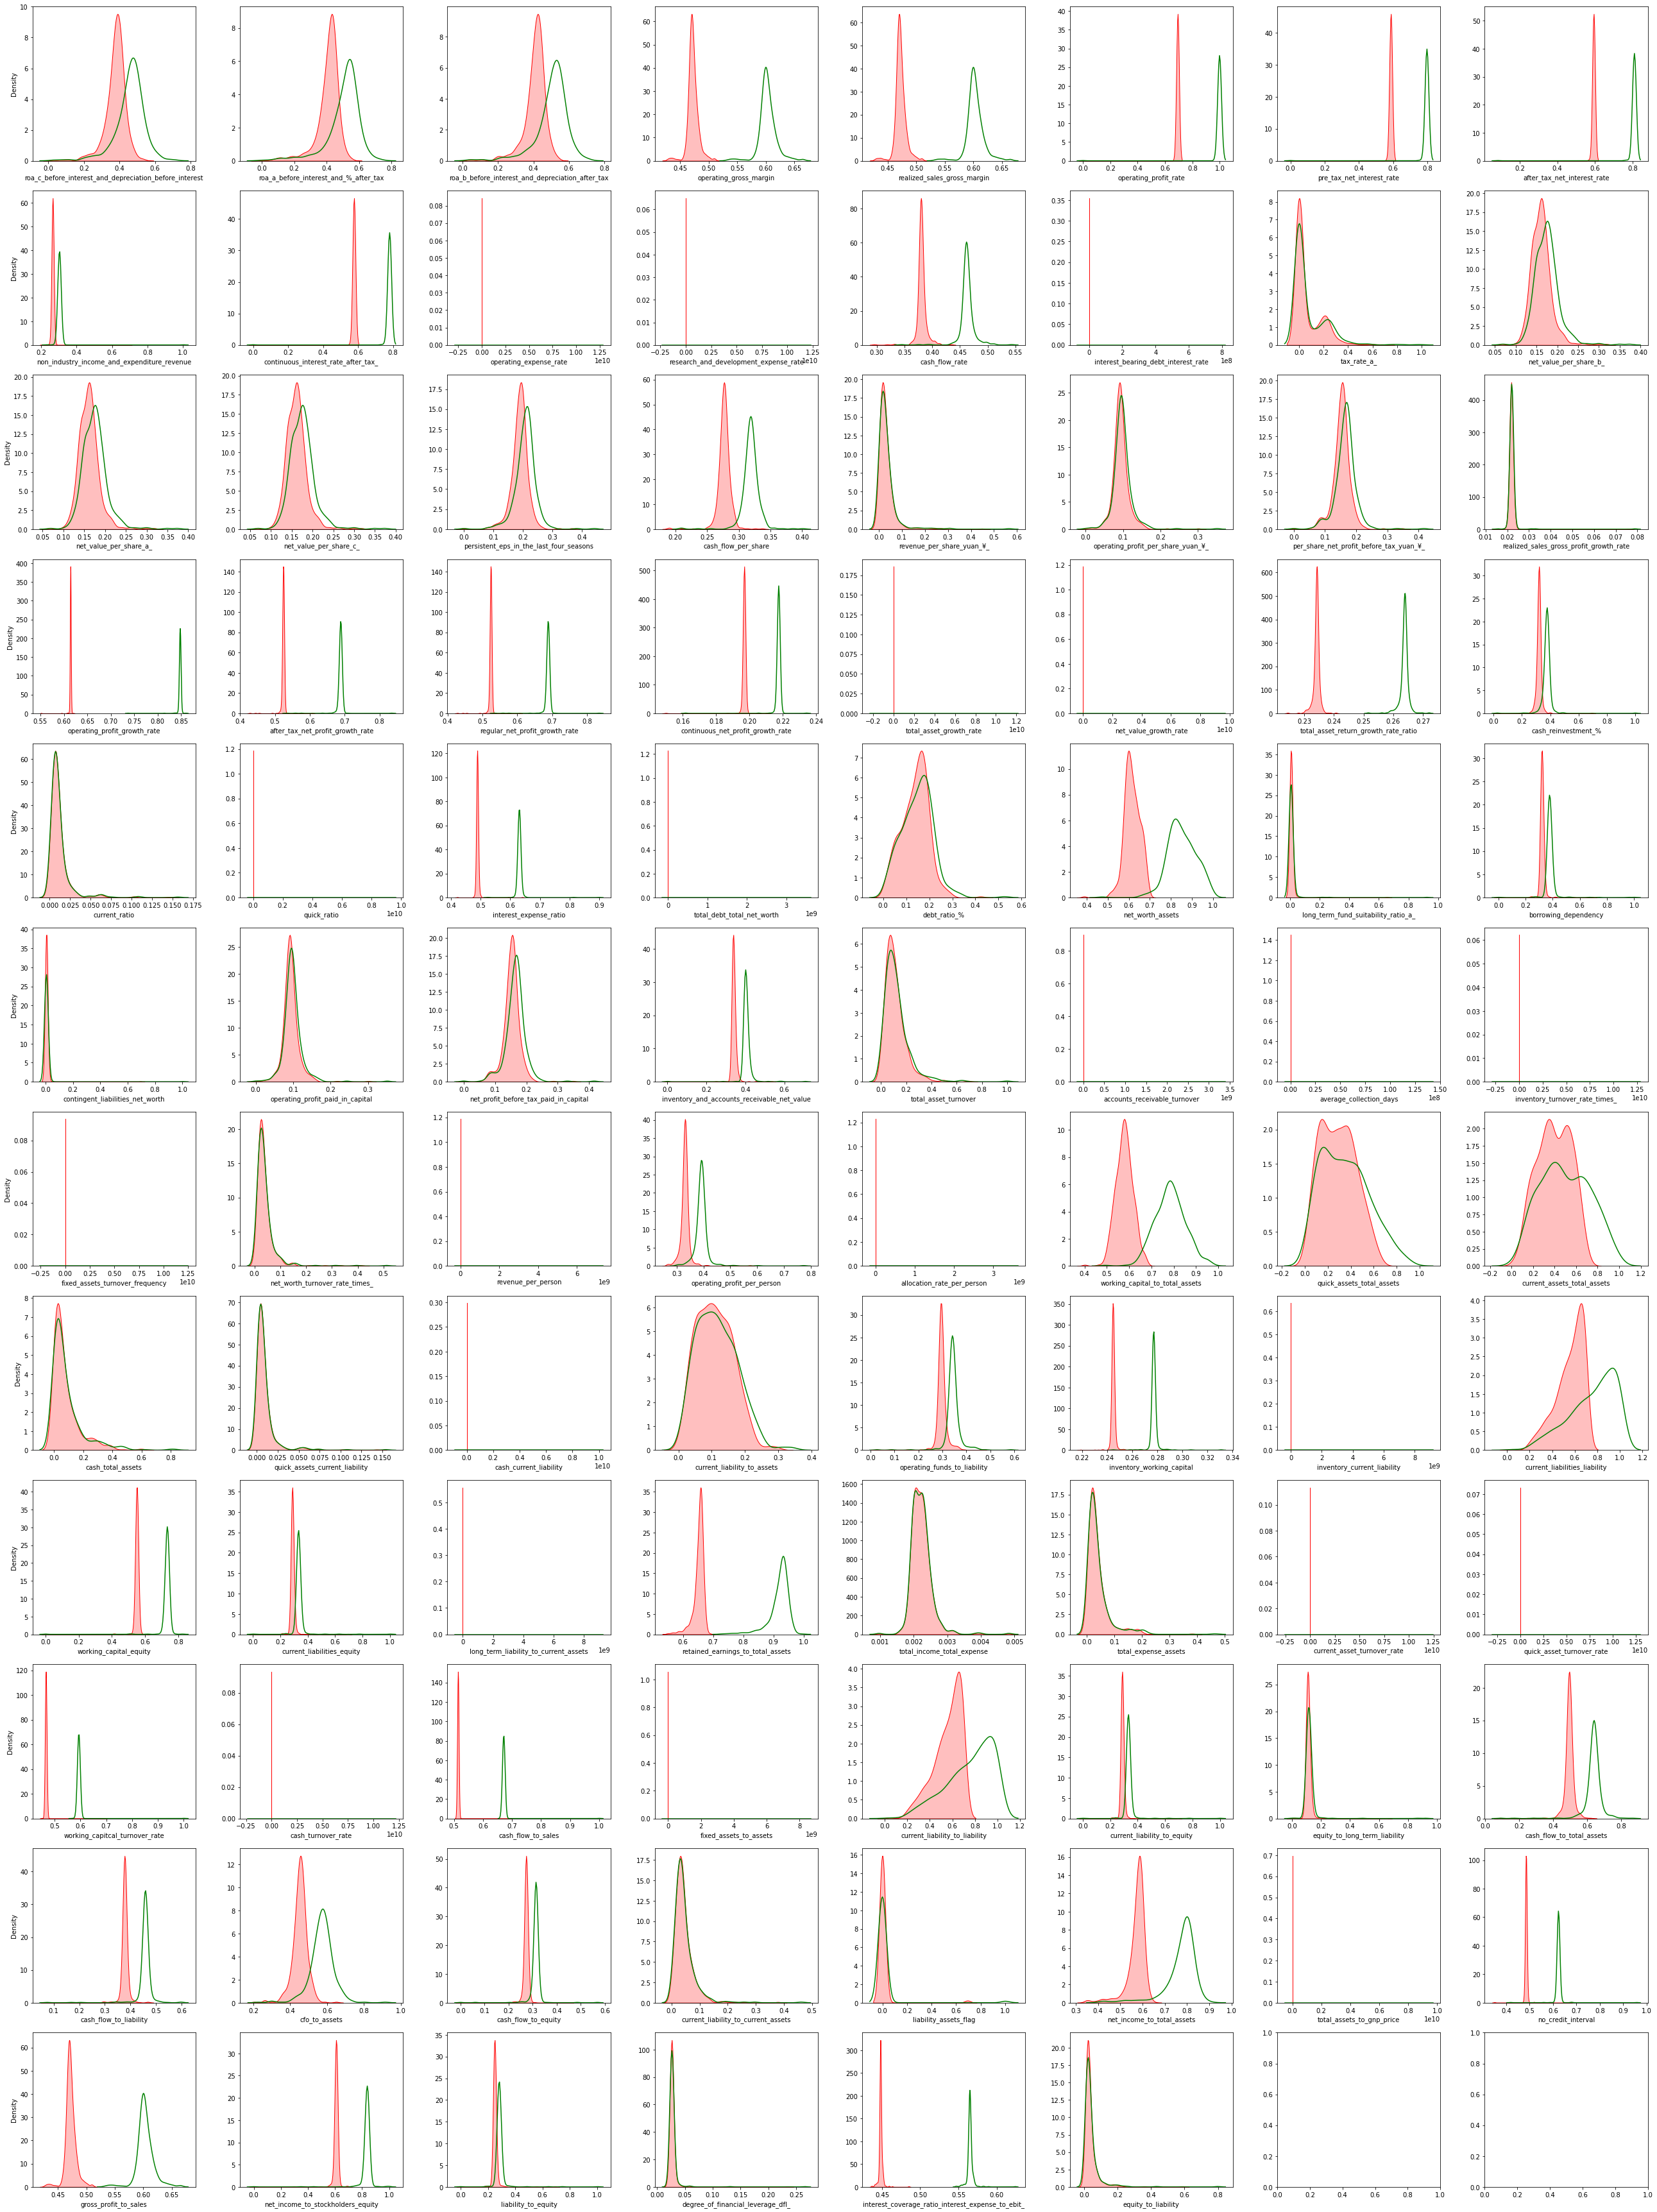

Red represents distributions after log transforms, green represents before log transform


In [25]:
# Visualisation of distributions after sub-sampling after outlier removal and log transform
compare_subdf2 = bankruptcy_subdf2.drop(["bankrupt_"],axis=1)

cols = list(bankruptcy_subdf4.columns)
ncols = 8
nrows = math.ceil(len(cols) / ncols)

fig, ax = plt.subplots(nrows, ncols, figsize = (4.5 * ncols, 4 * nrows))
for i in range(len(cols)):
    sns.kdeplot(bankruptcy_subdf4_log[cols[i]], ax = ax[i // ncols, i % ncols],fill=True,color="red")
    sns.kdeplot(bankruptcy_subdf2[cols[i]], ax = ax[i // ncols, i % ncols],color="green")
    if i % ncols != 0:
        ax[i // ncols, i % ncols].set_ylabel(" ")
plt.tight_layout()
plt.show()
print("Red represents distributions after log transforms, green represents before log transform")

<a id="section-six"></a>
# **6.0 Model Building**

In [26]:
pip install -U --ignore-installed --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.2/487.2 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 7.9 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - \ | / - 

In [27]:
# Train test split is done automatically in pycaret
from pycaret.classification import *
exp_name = setup(data = bankruptcy_subdf4,  target = bankruptcy_subdf3["bankrupt_"])

In [28]:
compare_models()

Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Pycaret showed the 3 models with the highest accuracies are
* Light Gradient Boosting Machine
* Gradient Boosting Classifier
* Extreme Gradient Boosting

Will use these 5 models for hyperparameter tuning

<a id="subsection-six.one"></a>
## **6.1 Cross-Validation for Selected Models**

In [29]:
print("LGBM Model")
lgb_clf = create_model("lightgbm")
lgb_clf_scoregrid = pull()

LGBM Model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [30]:
print("GBC Model")
gbc_clf = create_model("gbc")
gbc_clf_scoregrid = pull()

GBC Model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
print("XGB Model")
xgb_clf = create_model("xgboost")
xgb_clf_scoregrid = pull()

XGB Model


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

<a id="section-seven"></a>
# **7.0 Hyperparameter Tuning**

<a id="subsection-seven.one"></a>
## **7.1 Tuning**

In [32]:
print("Before Tuning")
print(lgb_clf_scoregrid.loc[["Mean","Std"]])
print("")
lgb_clf = tune_model(lgb_clf,choose_better=True)
print(lgb_clf)

Before Tuning
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8433  0.9233  0.8562  0.8497  0.8495  0.6866  0.6929
Std     0.0524  0.0429  0.0802  0.0681  0.0506  0.1046  0.1048



Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

In [33]:
print("Before Tuning")
print(gbc_clf_scoregrid.loc[["Mean","Std"]])
print("")
gbc_clf = tune_model(gbc_clf,choose_better=True)
print(gbc_clf)

Before Tuning
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8329  0.9242  0.8558  0.8324  0.8419  0.6649  0.6691
Std     0.0599  0.0403  0.0634  0.0750  0.0557  0.1204  0.1198



Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=6,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.002, min_samples_leaf=2,
                           min_samples_split=4, min_weight_fraction_leaf=0.0,
                           n_estimators=240, n_iter_no_change=None,
                           random_state=4233, subsample=0.65, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [34]:
print("Before Tuning")
print(xgb_clf_scoregrid.loc[["Mean","Std"]])
print("")
xgb_clf = tune_model(xgb_clf,choose_better = True)
print(xgb_clf)

Before Tuning
      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8400  0.9270  0.8562  0.8410  0.8460  0.6797  0.6852
Std     0.0582  0.0382  0.0906  0.0586  0.0583  0.1161  0.1187



Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=4233, reg_alpha=0, ...)


<a id="subsection-seven.two"></a>
## **7.2 Ensembling Model**

1. Bagged & Boosting Method
1. Blending
1. Stacking

Background: https://towardsdatascience.com/ensemble-learning-stacking-blending-voting-b37737c4f483

In [35]:
# Original
print(lgb_clf_scoregrid.loc[['Mean', 'Std']])

# Compare the original against bagged and boosted

# Bagged
lgb_clf = ensemble_model(lgb_clf,fold =5,choose_better = True)
# Boosted
lgb_clf = ensemble_model(lgb_clf,method="Boosting",choose_better = True)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8433  0.9233  0.8562  0.8497  0.8495  0.6866  0.6929
Std     0.0524  0.0429  0.0802  0.0681  0.0506  0.1046  0.1048


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will 

In [36]:
# Original
print(gbc_clf_scoregrid.loc[['Mean', 'Std']])

# Compare the original against bagged and boosted

# Bagged
gbc_clf = ensemble_model(gbc_clf,fold =5,choose_better = True)
# Boosted
gbc_clf = ensemble_model(gbc_clf,method="Boosting",choose_better = True)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8329  0.9242  0.8558  0.8324  0.8419  0.6649  0.6691
Std     0.0599  0.0403  0.0634  0.0750  0.0557  0.1204  0.1198


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [37]:
# Original
print(xgb_clf_scoregrid.loc[['Mean', 'Std']])

# Compare the original and boosted against bagged and boosted

# Bagged
xgb_clf = ensemble_model(xgb_clf,fold =5,choose_better = True)
# Boosted
xgb_clf = ensemble_model(xgb_clf,method="Boosting",choose_better = True)

      Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
Mean    0.8400  0.9270  0.8562  0.8410  0.8460  0.6797  0.6852
Std     0.0582  0.0382  0.0906  0.0586  0.0583  0.1161  0.1187


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the ensembled model, hence it will be returned. NOTE: The display metrics are for the ensembled model (not the original one).


### 7.3.1 Blend Models

In [38]:
blend_models([lgb_clf, gbc_clf, xgb_clf],choose_better=True)

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

VotingClassifier(estimators=[('Light Gradient Boosting Machine',
                              BaggingClassifier(base_estimator=LGBMClassifier(bagging_fraction=1.0,
                                                                              bagging_freq=6,
                                                                              boosting_type='gbdt',
                                                                              class_weight=None,
                                                                              colsample_bytree=1.0,
                                                                              feature_fraction=0.5,
                                                                              importance_type='split',
                                                                              learning_rate=0.2,
                                                                              max_depth=-1,
                                                    

### 7.3.2 Stacking

https://www.youtube.com/watch?v=0BGLfYY26zQ

In [39]:
stacker = stack_models(lgb_clf,gbc_clf)  #remove xgb as some issues

Processing:   0%|          | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

In [40]:
print(stacker)

StackingClassifier(cv=5,
                   estimators=[('Light Gradient Boosting Machine',
                                LGBMClassifier(bagging_fraction=1.0,
                                               bagging_freq=6,
                                               boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               feature_fraction=0.5,
                                               importance_type='split',
                                               learning_rate=0.2, max_depth=-1,
                                               min_child_samples=31,
                                               min_child_weight=0.001,
                                               min_split_gain=0.8,
                                               n_estimators=290, n_jobs=-1,
                                               num_l...
            

<a id="section-eight"></a>
# **8.0 Evaluate Models**

In [41]:
# evaluate_model(lgb_clf)

In [42]:
# evaluate_model(gbc_clf)

In [43]:
# evaluate_model(xgb_clf)

## **8.1 ROC-AUC**

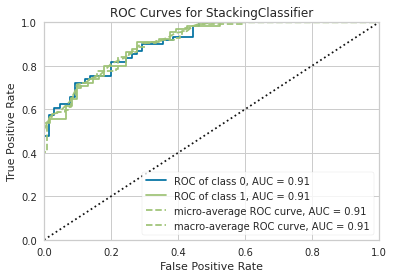

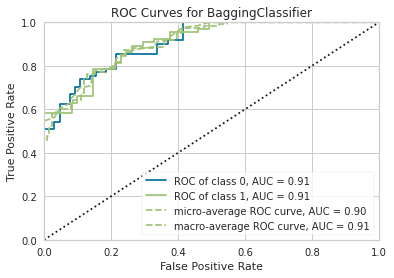

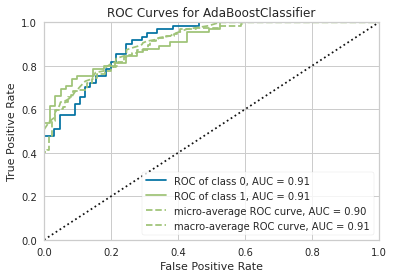

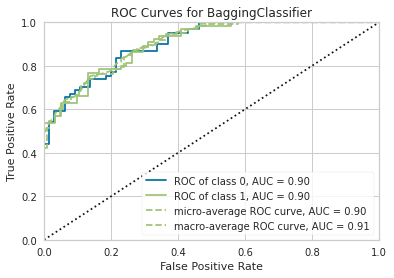

In [44]:
plot_model(stacker, plot = 'auc')   # Stacked classifier from ensembling
plot_model(lgb_clf, plot = 'auc')   # Bagging ensembling was most tuned for lgb and was chosen
plot_model(gbc_clf, plot = 'auc')   # Boosting ensembling was most tuned for gbc and was chosen
plot_model(xgb_clf, plot = 'auc')   # Basic xgb classifier was best performing even after tuning and ensembling, therefore chosen

## **8.2 Confusion Matrix**

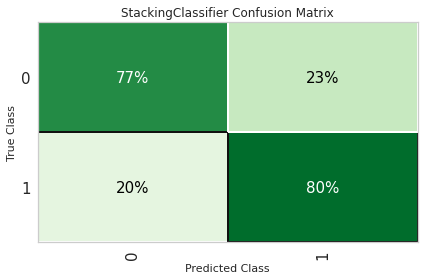

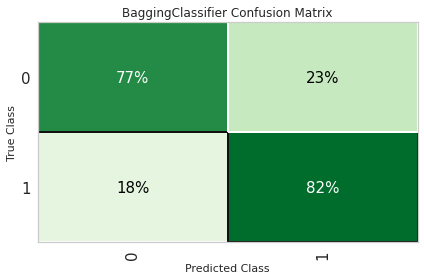

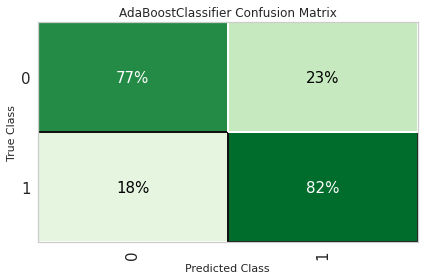

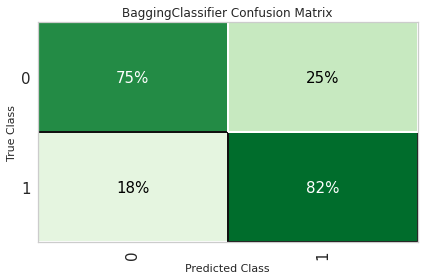

In [45]:
plot_model(stacker, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(lgb_clf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(gbc_clf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})
plot_model(xgb_clf, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

### **8.3 Learning Curve**

[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 

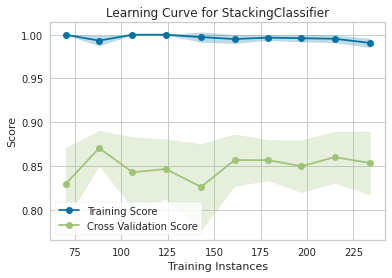

In [46]:
plot_model(stacker, plot = 'learning')

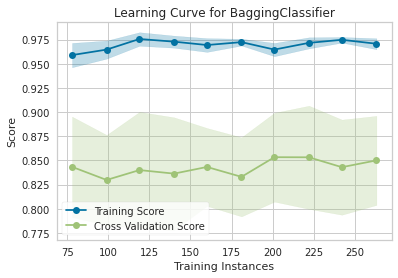

In [47]:
plot_model(lgb_clf, plot = 'learning')

<a id="section-nine"></a>
# **9. Discussion of results**

<a id="section-ten"></a>
# **10. Thoughts on Pycaret**